In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras import backend as K
from keras import utils as utls
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense

In [15]:
# Definição de Hiperparâmetros
imageRows, imageCols = 28, 28
batchSize = 256
numClasses = 10
epochs = 10

In [5]:
# Carregando o dataset
(XTrain, yTrain), (XTest, yTest) = mnist.load_data()

In [6]:
XTrain = XTrain.astype('float32')
XTest = XTest.astype('float32')
XTrain = XTrain / 255.0
XTest = XTest / 255.0

In [7]:
yTrain = utls.to_categorical(yTrain, numClasses)
yTest = utls.to_categorical(yTest, numClasses)

In [8]:
if K.image_data_format() == 'channels_first':
  XTrain = XTrain.reshape(XTrain.shape[0], 1, imageRows, imageCols)
  XTest = XTest.reshape(XTest.shape[0], 1, imageRows, imageCols)
  inputShape = (1, imageRows, imageCols)
else:
  XTrain = XTrain.reshape(XTrain.shape[0], imageRows, imageCols, 1)
  XTest = XTest.reshape(XTest.shape[0], imageRows, imageCols, 1)
  inputShape = (imageRows, imageCols, 1)


In [9]:
# Definindo o modelo LeNet
model = Sequential()
model.add(Conv2D(20, (5,5), padding='same', input_shape=inputShape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(50, (5,5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(numClasses))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 20)        520       
                                                                 
 activation (Activation)     (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        25050     
                                                                 
 activation_1 (Activation)   (None, 14, 14, 50)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 50)         0         
 2D)                                                    

In [10]:
# Compilação do modelo
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
minhaLeNetModel = model.fit(XTrain, yTrain, batch_size=batchSize, epochs=epochs, validation_data=(XTest, yTest))

Epoch 1/10
235/235 [==============================] - 60s 256ms/step - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.0311 - val_accuracy: 0.9884
Epoch 2/10
235/235 [==============================] - 67s 285ms/step - loss: 0.0191 - accuracy: 0.9939 - val_loss: 0.0263 - val_accuracy: 0.9916
Epoch 3/10
235/235 [==============================] - 66s 280ms/step - loss: 0.0152 - accuracy: 0.9952 - val_loss: 0.0260 - val_accuracy: 0.9914
Epoch 4/10
235/235 [==============================] - 62s 266ms/step - loss: 0.0121 - accuracy: 0.9962 - val_loss: 0.0260 - val_accuracy: 0.9914
Epoch 5/10
235/235 [==============================] - 61s 261ms/step - loss: 0.0104 - accuracy: 0.9964 - val_loss: 0.0291 - val_accuracy: 0.9904
Epoch 6/10
235/235 [==============================] - 59s 252ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0356 - val_accuracy: 0.9892
Epoch 7/10
235/235 [==============================] - 59s 252ms/step - loss: 0.0072 - accuracy: 0.9978 - val_loss: 0.0330 - val_ac

Text(0, 0.5, 'Acurácia')

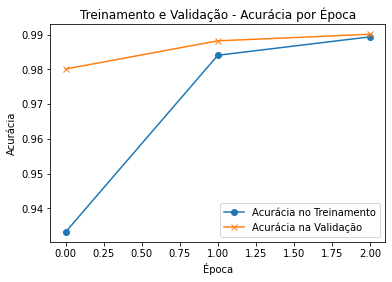

In [12]:
f, ax = plt.subplots()
ax.plot(minhaLeNetModel.history['accuracy'], 'o-')
ax.plot(minhaLeNetModel.history['val_accuracy'], 'x-')
ax.legend(['Acurácia no Treinamento', 'Acurácia na Validação'], loc=0)
ax.set_title('Treinamento e Validação - Acurácia por Época')
ax.set_xlabel('Época')
ax.set_ylabel('Acurácia')

Text(0, 0.5, 'Perda')

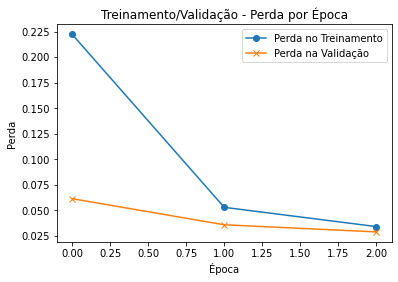

In [13]:
f, ax = plt.subplots()
ax.plot(minhaLeNetModel.history['loss'], 'o-')
ax.plot(minhaLeNetModel.history['val_loss'], 'x-')
ax.legend(['Perda no Treinamento', 'Perda na Validação'], loc=0)
ax.set_title('Treinamento/Validação - Perda por Época')
ax.set_xlabel('Época')
ax.set_ylabel('Perda')